#**Importing Tools**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


#**Data**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/kaggle/train.csv")
data = np.array(data)
m,n = data.shape
np.random.shuffle(data)

data_train = data[1000:m].T
Y = data_train[0]
X = data_train[1:n]
X = X / 255

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255


#**Functions for NN**

In [ ]:
def init_params():
  W1 = np.random.rand(16,784) -0.5
  b1 = np.random.rand(16,1) -0.5
  W2 = np.random.rand(16,16) -0.5
  b2 = np.random.rand(16,1) -0.5
  W3 = np.random.rand(10,16) -0.5
  b3 = np.random.rand(10,1) -0.5
  return W1,b1,W2,b2,W3,b3

def ReLU(Z):
  return np.maximum(Z,0)

def softmax(Z):
  A = np.exp(Z) / sum(np.exp(Z))
  return A

def forward_prop(W1, b1, W2, b2, W3, b3, X):
  Z1 = W1.dot(X) + b1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = ReLU(Z2)
  Z3 = W3.dot(A2) + b3
  A3 = softmax(Z3)
  return Z1, A1, Z2, A2, Z3, A3

def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size),Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y

def deriv_ReLU(Z):
  return  Z > 0

def back_prop(Z1, A1, Z2, A2, W2, Z3, A3, W3, X, Y):
  m = Y.size
  one_hot_Y = one_hot(Y)
  dZ3 = A3 - one_hot_Y
  dW3 = 1/m * dZ3.dot(A2.T)
  db3 = 1/m * np.sum(dZ3)
  dZ2 = W3.T.dot(dZ3) * deriv_ReLU(Z2)
  dW2 = 1/m * dZ2.dot(A1.T)
  db2 = 1/m * np.sum(dZ2)
  dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
  dW1 = 1/m * dZ1.dot(X.T)
  db1 = 1/m * np.sum(dZ1)
  return db1, dW1, db2, dW2, db3, dW3

def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
  W1 = W1 - alpha * dW1
  W2 = W2 - alpha * dW2
  W3 = W3 - alpha * dW3
  b1 = b1 - alpha * db1
  b2 = b2 - alpha * db2
  b3 = b3 - alpha * db3
  return W1, b1, W2, b2, W3, b3

#**Gradient descent**

In [ ]:
def get_predictions(A):
  return np.argmax(A, 0)

def get_accuracy(Y_pred, Y_real):
  return np.sum(Y_pred == Y_real) / Y_real.size

def gradient_descent(X, Y, iterations, alpha):
  W1, b1, W2, b2, W3, b3 = init_params()
  for i in range(iterations):
    Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    db1, dW1, db2, dW2, db3, dW3 = back_prop(Z1, A1, Z2, A2, W2, Z3, A3, W3, X, Y)
    W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
    if i % 200 == 0:
      print("Iteration: ", i)
      print("Accuracy: ", get_accuracy(get_predictions(A3),Y))
  return W1, b1, W2, b2, W3, b3

#**Building Neural Network**

In [ ]:
W1, b1, W2, b2, W3, b3 = gradient_descent(X, Y, 2001, 0.1)

Iteration:  0
[3 8 1 ... 8 3 8] [2 7 2 ... 4 8 5]
Accuracy:  0.09392682926829268
Iteration:  200
[2 7 2 ... 4 8 5] [2 7 2 ... 4 8 5]
Accuracy:  0.8084146341463415
Iteration:  400
[2 7 2 ... 4 8 5] [2 7 2 ... 4 8 5]
Accuracy:  0.8638780487804878
Iteration:  600
[2 7 2 ... 4 8 5] [2 7 2 ... 4 8 5]
Accuracy:  0.8821707317073171
Iteration:  800
[2 7 2 ... 4 8 5] [2 7 2 ... 4 8 5]
Accuracy:  0.8934146341463415
Iteration:  1000
[2 7 2 ... 4 8 5] [2 7 2 ... 4 8 5]
Accuracy:  0.9021463414634147
Iteration:  1200
[2 7 2 ... 4 8 5] [2 7 2 ... 4 8 5]
Accuracy:  0.908
Iteration:  1400
[2 7 2 ... 4 8 5] [2 7 2 ... 4 8 5]
Accuracy:  0.9134878048780488
Iteration:  1600
[2 7 2 ... 4 8 5] [2 7 2 ... 4 8 5]
Accuracy:  0.9174878048780488
Iteration:  1800
[2 7 2 ... 4 8 5] [2 7 2 ... 4 8 5]
Accuracy:  0.9213902439024391
Iteration:  2000
[2 7 2 ... 4 8 5] [2 7 2 ... 4 8 5]
Accuracy:  0.9236585365853659


#**Prediction functions**

In [ ]:
def make_predictions(X, W1, b1, W2, b2, W3, b3):
  _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
  predictions = get_predictions(A3)
  return predictions

def test_prediction(index, W1, b1, W2, b2, W3, b3):
  current_image = X_dev[:, index, None]
  prediction = make_predictions(X_dev[:, index, None], W1, b1, W2, b2, W3, b3)
  label = Y_dev[index]
  print("Prediction: ", prediction)
  print("Label: ", label)

  current_image = current_image.reshape((28, 28)) * 255
  plt.imshow(current_image, interpolation='nearest')
  plt.rcParams["figure.figsize"] = (2,2)
  plt.show()
  plt.rcParams["figure.figsize"] = (2,2)

#**Single predictions**

Prediction:  [7]
Label:  7


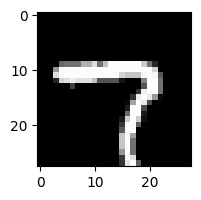

Prediction:  [3]
Label:  3


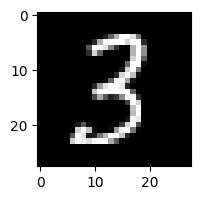

Prediction:  [2]
Label:  2


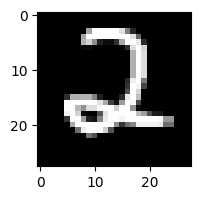

Prediction:  [6]
Label:  6


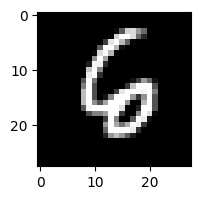

In [ ]:
test_prediction(0, W1, b1, W2, b2, W3, b3)
test_prediction(58, W1, b1, W2, b2, W3, b3)
test_prediction(25, W1, b1, W2, b2, W3, b3)
test_prediction(50, W1, b1, W2, b2, W3, b3)

#**Testing with new data**

In [ ]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2, W3, b3)
get_accuracy(dev_predictions, Y_dev)

0.91